# Logistic Regression with non-linear features

# Assignment Explanation   
Loss function을 quadratic regularization을 포함해야 한다. LR을 통해 이중 분류를 하는데 사용자가 정의한 feature을 기반으로 정의, 그런데 이 때 Loss func에 위를 포함하는 것이 목표이다. optimal theta의 값을 찾는 데이터가 train, 현재 얻은 classifier가 학습 X 데이터에서도 좋은 성능을 내는지 확인하기 위한 것이 test, model validation이라고도 한다. train, test에 모두 걸맞는 모델이어야, 잘 작동하여야 한다. generalization을 높여야 한다는 것! 이를 위해 regularization을 사용한다. 오버피팅 방지, 부드럽게 만들기 위한 방법 중 하나 ~   

데이터는 2차원의 n개 포인트, testing도 동일한 형식으로 주어짐, 모델 파라미터를 결정하는데에는 train만 사용하고, generalization을 평가하기 위해 train, test에 accuracy를 계산한다. 업데이트 모델 파라미터는 train에만 해당, evaluation 할 때 둘다 사용한다. feature function은 임의로 정의한다. 즉, x,y를 input으로 받는 func이며, 첫 번째 element는 1, p차원 벡터이다.   

Objective 함수의 arg는 모델 파라미터 theta, training data에 대해 주어진대로 residual을 더하고, quadratic regularization을 더해준다. 모델 파라미터의 L2 norm이라는 것은 식의 정의대로 theta의 각각의 element를 제곱해서 모두 더한 것이다. 모델 파라미터 벡터의 inner product로 정의할 수 있다. 이것을 통해서 objective func에 포함되었다는 것은 theta 값이 커지면 loss가 커진다. 최적화 과정에서 로스를 작게 하려면 theta가 0에 가까워야 한다. 모든 theta가 0이 되거나 많은 수의 theta가 0이 된다는 말은 우리가 얻은 regression func이 점점 theta가 수가 작아짐에 따라 단순화되게 된다. theta가 작아짐 = 함수 커브가 단순화된다. 그래서 매우 복잡한 regression 함수를 단순하게 만드는데, 함수가 단순하게 되면 주어진 포인트들의 로스가 커진다. 이것이 얼마만큼 단순한 커브를 얻을지에 대해 정하는 파라미터가 alpha이다. alpha가 매우 크게 된다면 theta가 조금만 커져도 로스가 커지기 떄문에 최적화 과정에서 theta를 작게 만드려고 할 것이어서 커브가 단순해지게 된다. alpha가 작으면 theta가 크더라도 증가하는 loss가 상대적으로 적기 때문에 복잡한 curve를 유지한다. alpha는 constant, 0보다 크다.   

최적한 theta 값을 얻게 되면 로지스틱 함수를 얻게 되면 입력에 대해 레이블을 결정한다. 최적 파라미터를 찾기 위해서는 Gradient descent를 이용하며, learning rate는 직접 선택해야 한다.   

채점기준: training, test accuracy에 따라 순위를 매기고, 차등해 점수 부여

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

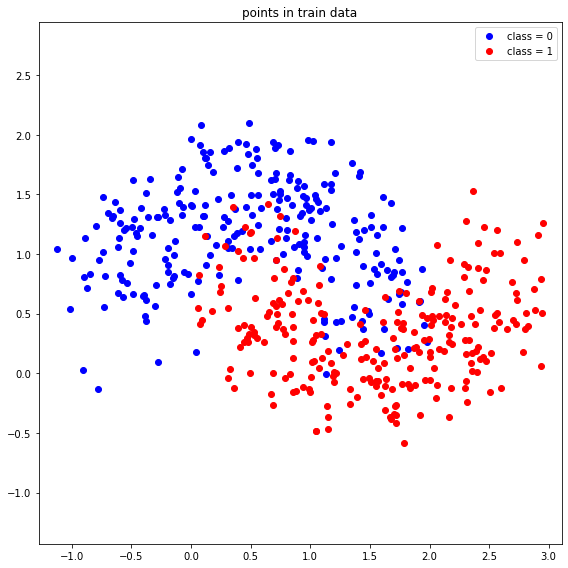

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

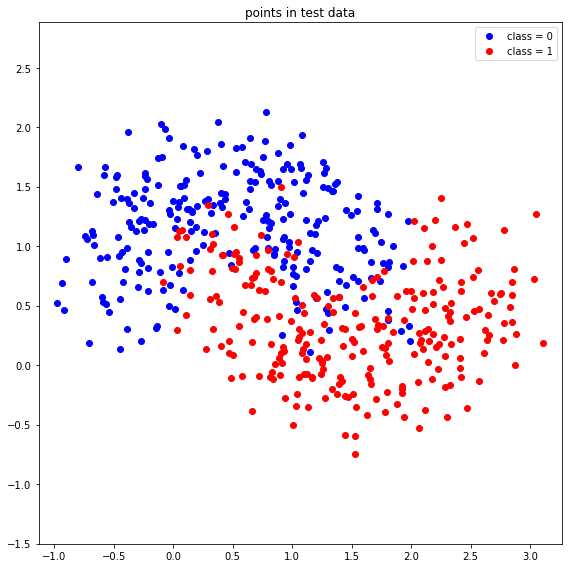

In [5]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [67]:
def compute_feature(point): # feature vec 정의

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # data_train_point_x  = data_train_point[:, 0]
    # data_train_point_y  = data_train_point[:, 1]
    feature = np.column_stack((np.ones(len(point)),  point[:, 0], point[:, 0]**2, point[:, 0] **3, point[:, 1], point[:, 0] * point[:, 1]))
    # the best = np.column_stack((np.ones(len(point)),  point[:, 0], point[:, 0]**2, point[:, 0] **3, point[:, 1], point[:, 1]**3 ))
    # origin = np.column_stack((np.ones(len(point)),  point[:, 0] * point[:, 1], point[:, 0]**2, point[:, 0] * point[:, 1]**2, point[:, 0] **3, point[:, 1]**3))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [4]:
def compute_linear_regression(theta, feature): # inner prod

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = np.dot(feature, theta.T) 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [5]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = 1 / (1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [6]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [7]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    h = compute_logistic_regression(theta, feature) 
    residual = - label * np.log(h) - (1 - label) * np.log(1 - h)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$   
- $\lVert \theta \rVert^2_2$ = $\theta_0 ^2​+ \theta_1^2​ + \cdots + \theta_{p-1} ^2​$  = $\mathbf{\theta}^\intercal \theta$

In [8]:
def compute_loss(theta, feature, label, alpha):
    # 알파에 따라 가중치를 둔 quadratic regularization 고려한 loss 정의
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = (1 / feature.shape[0]) * np.sum(compute_residual(theta, feature, label)) + alpha / 2 * np.dot(theta.T, theta)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [9]:
def compute_gradient(theta, feature, label, alpha):
    # residual + alpha term을 통해 objective 함수 정의, gradient 계산
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    h = compute_logistic_regression(theta, feature)
    # 로스에 대한 파라미터의 gradient 구하고 descent 통해 최적화
    gradient =  (1 / feature.shape[0]) * np.dot(feature.T , (h - label)) + alpha / 2 * 2 * theta

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [10]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    predictions = []
    for prob in compute_logistic_regression(theta, feature):
        if prob >= 0.5 :
            predictions.append(1)
        else:
            predictions.append(0)
    
    N = label.shape[0]
    accuracy = np.sum((label == predictions)) / N

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [62]:
number_iteration    = 50000 # you can change this value as you want 
learning_rate       = 0.3 # you can change this value as you want 
number_feature      = 6 # you can change this value as you want
alpha               = 0.001 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [63]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    train_feature = compute_feature(data_train)
    train_label = data_train_label
    test_feature = compute_feature(data_test)
    test_label = data_test_label

    theta           = theta - learning_rate * compute_gradient(theta, train_feature, train_label, alpha) # training data만 사용할 것!!
    loss_train      = compute_loss(theta, train_feature, train_label, alpha)
    loss_test       = compute_loss(theta, test_feature, test_label, alpha)
    accuracy_train  = compute_accuracy(theta, train_feature, train_label)
    accuracy_test   = compute_accuracy(theta, test_feature, test_label)

    # 현재 theta를 통한 모델을 train, test data로 loss, acc을 통해 evaluate
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [14]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [15]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [16]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [17]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [18]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [19]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.8940000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.8800000000
**************************************************
## [RESULT 03]
**************************************************


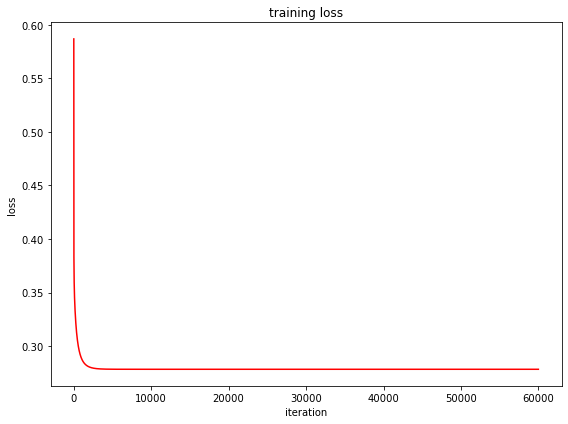

**************************************************
## [RESULT 04]
**************************************************


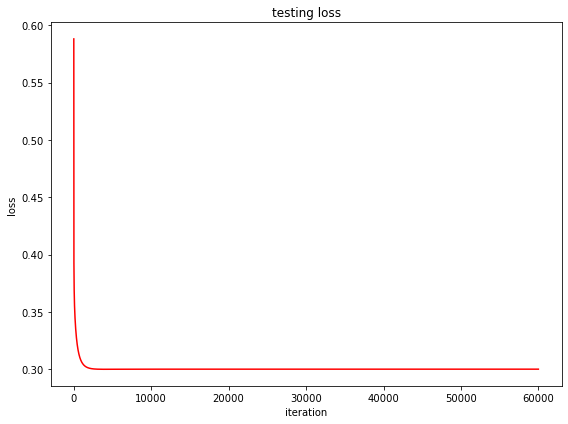

**************************************************
## [RESULT 05]
**************************************************


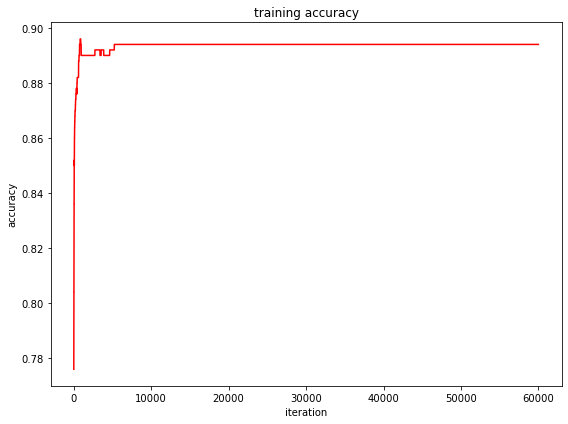

**************************************************
## [RESULT 06]
**************************************************


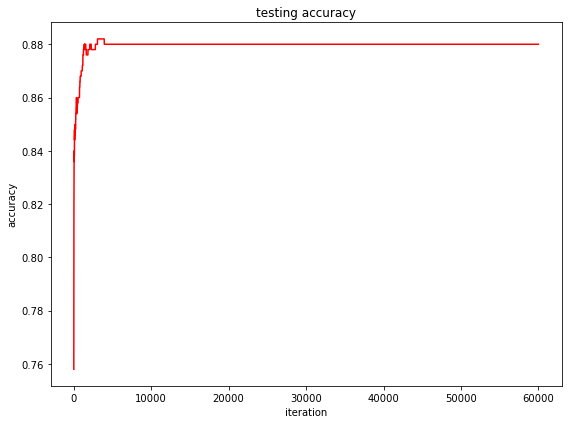

In [64]:
number_result = 6

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)

In [66]:
print("final loss for train = {:13.10f}".format(loss_iteration_train[-1]))
print("final loss for test = {:13.10f}".format(loss_iteration_test[-1]))
print("final accuracy for train = {:13.10f}".format(accuracy_iteration_train[-1]))
print("final accuracy for test = {:13.10f}".format(accuracy_iteration_test[-1]))

# 0.2800480545, 0.3026907720 theta 5
# 0.2783675776, 0.3000674270 / 0.894, 0.880 theta 6

final loss for train =  0.2783675776
final loss for test =  0.3000674270
final accuracy for train =  0.8940000000
final accuracy for test =  0.8800000000


## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [46]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # feature = np.column_stack((np.ones(len(point)),  point[:, 0], point[:, 0]**2, point[:, 0] **3, point[:, 1], point[:, 1]**3 ))
    ZZ = theta[0] + theta[1] * XX + theta[2] * XX**2 + theta[3] * XX**3 + theta[4] * YY + theta[5] * YY **3

    #levels = ticker.MaxNLocator(nbins =100).tick_values(ZZ[:-1, :-1].min(), ZZ[:-1, :-1].max())
    
    #plt.contourf(XX, YY, ZZ, cmap = plt.cm.RdBu_r, levels=levels) # 색상 표시
    

    plt.contour(XX, YY, ZZ, levels = 0, colors='k') # 등고선 표시
    plt.set_cmap('RdBu_r')
    norm = colors.TwoSlopeNorm(vcenter=0)

    plt.pcolormesh(XX, YY, ZZ, norm=norm)
    plt.colorbar()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

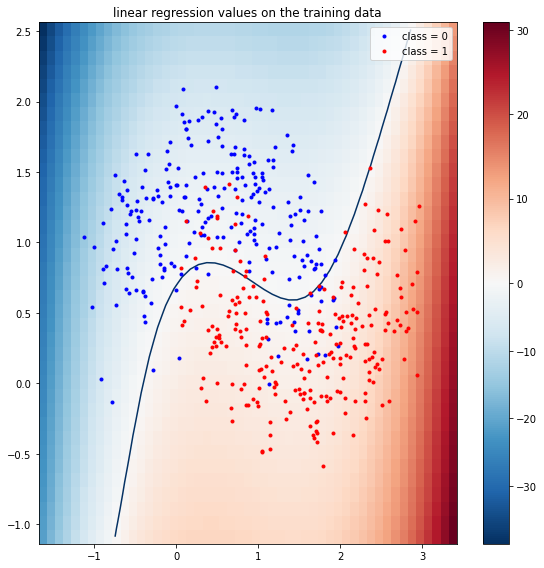

In [47]:
function_result_07()

In [ ]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [ ]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

In [ ]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)